# Task 2

Importiamo df_test_aggregated.pkl

In [9]:
import os
import pandas as pd

path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "test_data_aggregated.pkl")

df_test_aggregated = pd.read_pickle(file_path)

print("Il Dataframe test_data_aggregated.pkl è il seguente:")
print(df_test_aggregated.head())

print("\nLa dimensione è:", df_test_aggregated.shape)

Il Dataframe test_data_aggregated.pkl è il seguente:
   P1_time_mean  P1_time_median  P1_time_p25  P1_time_p75  P1_time_variance  \
0      1.984422        1.965596     1.898145     2.057667          0.090330   
1      1.984932        1.959335     1.893304     2.062764          0.093511   
2      1.984972        1.959743     1.893367     2.058572          0.095046   
3      1.985002        1.956308     1.893223     2.058859          0.095035   
4      1.984954        1.959155     1.893371     2.058777          0.095023   

   P1_time_line_integral  P1_time_min  P1_time_max  P1_freq_peak_value  \
0            2381.280903     0.561754     4.411926        10735.216150   
1            2381.879996     0.453799     4.103312        10976.103217   
2            2381.927644     0.436712     4.262760        11079.034425   
3            2381.962902     0.442751     4.279393        11076.215410   
4            2381.905815     0.437060     4.270896        11079.884937   

   P1_freq_peak_freq  ...  

### Step 1: predirre le etichette per i dati di test (in test_data_aggregated)

Vado a predirre le etichette di Condition (0 o 1) per i dati di test che non risultano etichettati, e questo lo vado a fare grazie al modello pre-addestrato nel Task 1 (Random Forest)

Importiamo il modello Random Forest del Task 1

In [ ]:
import pickle

with open("../task1/rf_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

Creo il DataFrame di feature eliminando la colonna "Case" (non serve per le predizioni)

In [12]:
df_test_features = df_test_aggregated.drop(columns=["Case"])

Uso il modello per fare le predizioni sul DataFrame di feature

In [13]:
predictions = rf_model.predict(df_test_features)

Aggiungiamo le predizioni al DataFrame df_test_aggregated

In [17]:
df_test_aggregated["Predicted_BinaryCondition"] = predictions

Esportiamo df_test_aggregated_labeled in .csv e .pkl

In [19]:
df_test_aggregated.to_csv("../dataset/dataframes/test_data_aggregated_labeled.csv", index=False)
df_test_aggregated.to_pickle("../dataset/dataframes/test_data_aggregated_labeled.pkl")

### Step 2: Clustering degli Anomaly Test Data (dove Condition == 1) in Unknown Anomaly e Known Anomaly

Filtro il DataFrame per mantenere solo le righe dove Predicted_BinaryCondition è 1

In [20]:
df_filtered = df_test_aggregated[df_test_aggregated["Predicted_BinaryCondition"] == 1]

Eliminiamo le colonne "Case" e "Predicted_BinaryCondition" dal DataFrame filtrato

In [21]:
df_filtered = df_filtered.drop(columns=["Case", "Predicted_BinaryCondition"])

In [25]:
print(df_filtered.columns)

Index(['P1_time_mean', 'P1_time_median', 'P1_time_p25', 'P1_time_p75',
       'P1_time_variance', 'P1_time_line_integral', 'P1_time_min',
       'P1_time_max', 'P1_freq_peak_value', 'P1_freq_peak_freq',
       'P1_freq_sum_power_spectrum', 'P1_freq_std_power_spectrum',
       'P1_freq_rms_freq', 'P2_time_mean', 'P2_time_median', 'P2_time_p25',
       'P2_time_p75', 'P2_time_variance', 'P2_time_line_integral',
       'P2_time_min', 'P2_time_max', 'P2_freq_peak_value', 'P2_freq_peak_freq',
       'P2_freq_sum_power_spectrum', 'P2_freq_std_power_spectrum',
       'P2_freq_rms_freq', 'P3_time_mean', 'P3_time_median', 'P3_time_p25',
       'P3_time_p75', 'P3_time_variance', 'P3_time_line_integral',
       'P3_time_min', 'P3_time_max', 'P3_freq_peak_value', 'P3_freq_peak_freq',
       'P3_freq_sum_power_spectrum', 'P3_freq_std_power_spectrum',
       'P3_freq_rms_freq', 'P4_time_mean', 'P4_time_median', 'P4_time_p25',
       'P4_time_p75', 'P4_time_variance', 'P4_time_line_integral',
       

Ecco un esempio completo che esegue il clustering con k-means (2 cluster) sul DataFrame df_filtered, riduce la dimensionalità con PCA per visualizzare i cluster su un grafico 2D e individua le feature più discriminative confrontando i centroidi dei due cluster:

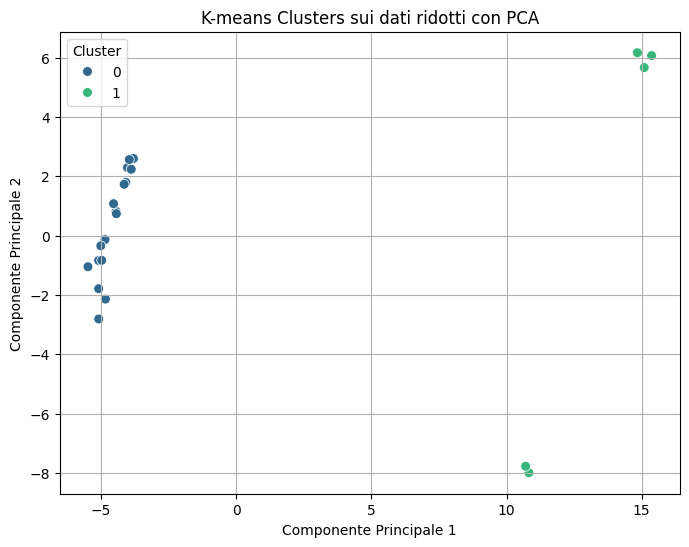

Varianza spiegata dalle due componenti: [0.65799538 0.16337537]


In [41]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Standardizza i dati (molto utile per la PCA e il clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered)

# 2. Applica la PCA per ridurre la dimensionalità a 2 componenti
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Crea un DataFrame con le componenti principali per la visualizzazione
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# 3. Applica k-means sui dati ridotti (o direttamente sui dati standardizzati)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Aggiungi l'assegnazione dei cluster al DataFrame PCA
df_pca['Cluster'] = clusters

# 4. Visualizza i cluster su un grafico scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=50)
plt.title("K-means Clusters sui dati ridotti con PCA")
plt.xlabel("Componente Principale 1")
plt.ylabel("Componente Principale 2")
plt.grid(True) 
plt.show()

# Visualizza anche la percentuale di varianza spiegata dalle 2 componenti
print("Varianza spiegata dalle due componenti:", pca.explained_variance_ratio_)

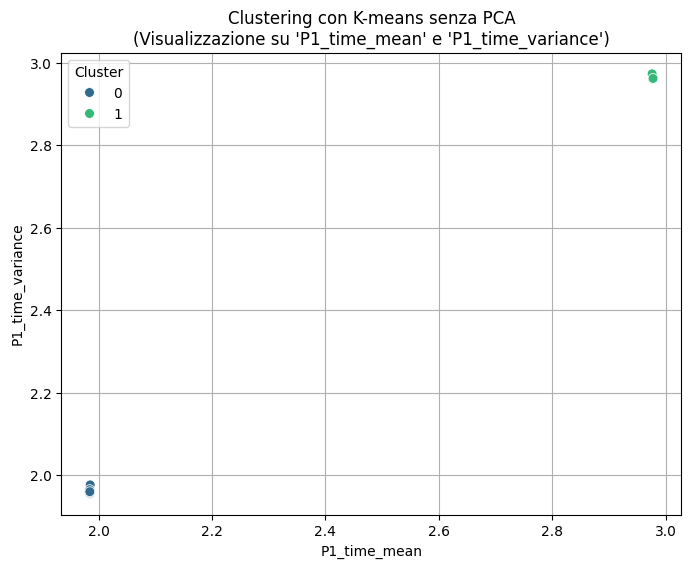

In [49]:
# 1. Standardizza il dataset completo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered)

# 2. Applica K-means sui dati standardizzati
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Aggiungi l'assegnazione dei cluster al DataFrame originale (o a una copia)
df_filtered['Cluster'] = clusters

# 3. Visualizza i cluster proiettando su due feature significative
# Ad esempio, scegliamo 'P1_time_mean' e 'P1_time_variance'
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_filtered['P1_time_mean'], 
                y=df_filtered['P1_time_median'], 
                hue=df_filtered['Cluster'], 
                palette='viridis', 
                s=50)
plt.title("Clustering con K-means senza PCA\n(Visualizzazione su 'P1_time_mean' e 'P1_time_variance')")
plt.xlabel("P1_time_mean")
plt.ylabel("P1_time_variance")
plt.grid(True)
plt.show()

In [37]:
df_filtered

,P1_time_mean,P1_time_median,P1_time_p25,P1_time_p75,P1_time_variance,P1_time_line_integral,P1_time_min,P1_time_max,P1_freq_peak_value,P1_freq_peak_freq,...,P7_time_variance,P7_time_line_integral,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Cluster
0,1.984422,1.965596,1.898145,2.057667,0.090330,2381.280903,0.561754,4.411926,10735.216150,62.447960,...,0.301989,2366.205104,-0.003637,4.960276,34566.752154,62.447960,217794.811254,2084.029330,19.052332,0
1,1.984932,1.959335,1.893304,2.062764,0.093511,2381.879996,0.453799,4.103312,10976.103217,64.945878,...,0.329252,2366.481721,-0.002775,5.085864,46662.202025,64.945878,237456.962256,2617.500682,19.893758,0
6,2.976179,2.974052,2.870958,3.064182,0.106137,3571.409382,1.411117,5.319466,10843.669116,42.464613,...,0.326651,3556.177745,0.865684,5.727131,38622.068955,42.464613,235581.008352,2539.558675,19.815020,1
8,1.984192,1.960871,1.892085,2.064041,0.079165,2381.034888,0.525377,4.156134,10324.925235,59.950042,...,0.367645,2363.402346,-0.001868,5.667324,46027.696112,59.950042,265146.017033,2473.864388,21.021656,0
10,1.984494,1.960064,1.892488,2.062226,0.092402,2381.355854,0.251441,4.061753,10576.765488,64.945878,...,0.330064,2366.865845,-0.001705,5.309122,45730.645223,64.945878,238042.484593,2585.173470,19.918270,0
12,1.984945,1.958735,1.892944,2.062354,0.094568,2381.895127,0.438743,4.274295,11078.754688,64.945878,...,0.333647,2367.870248,0.011023,4.964566,46544.956754,64.945878,240626.271372,2650.561382,20.026078,0
14,2.978119,2.960672,2.859740,3.068212,0.123376,3573.706128,1.265630,5.509053,12795.441732,64.945878,...,0.424335,3559.625641,0.979007,6.247789,49944.257476,64.945878,306030.427243,3187.968468,22.584302,1
15,1.984388,1.955877,1.892326,2.059586,0.094680,2381.255100,0.598692,4.379292,10802.636968,64.945878,...,0.313487,2361.286896,0.000599,5.019550,39642.577062,64.945878,226086.946314,2412.014375,19.411635,0
18,1.984876,1.961548,1.893872,2.055809,0.085274,2381.837115,0.543228,4.451440,9475.374287,59.950042,...,0.299818,2361.818259,0.011591,5.006715,32312.378412,59.950042,216228.884135,1921.560558,18.983716,0
19,1.985009,1.969709,1.893736,2.063729,0.077480,2382.017506,0.581277,4.035789,9731.493098,59.950042,...,0.387406,2371.146669,0.349584,5.381372,66135.809773,59.950042,279397.458219,3297.805389,21.579213,0


In [44]:
clusters

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1], dtype=int32)

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Supponiamo che df_filtered contenga molte colonne,
# ma vogliamo usare solo 'P1_time_mean' e 'P1_time_median'

# 1. Seleziona le due feature
X = df_filtered[['P1_time_mean', 'P1_time_median']]

# 2. Standardizza solo quelle due colonne
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Applica K-means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Calcola la silhouette
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score (2 feature):", sil_score)

Silhouette Score (2 feature): 0.9954284982661297


In [56]:
df_known = df_filtered[df_filtered['Cluster'].isin([0])]
df_unknown = df_filtered.loc[df_filtered['Cluster'].isin([1])]

print("Dataframe KNOWN:\n", df_known)
print("\nDataframe UNKNOWN:\n", df_unknown)

Dataframe KNOWN:
     P1_time_mean  P1_time_median  P1_time_p25  P1_time_p75  P1_time_variance  \
0       1.984422        1.965596     1.898145     2.057667          0.090330   
1       1.984932        1.959335     1.893304     2.062764          0.093511   
8       1.984192        1.960871     1.892085     2.064041          0.079165   
10      1.984494        1.960064     1.892488     2.062226          0.092402   
12      1.984945        1.958735     1.892944     2.062354          0.094568   
15      1.984388        1.955877     1.892326     2.059586          0.094680   
18      1.984876        1.961548     1.893872     2.055809          0.085274   
19      1.985009        1.969709     1.893736     2.063729          0.077480   
24      1.984803        1.955662     1.891361     2.064053          0.091184   
26      1.984459        1.963269     1.896229     2.057770          0.085698   
31      1.985203        1.976405     1.895775     2.062013          0.076144   
33      1.984754      